In [2]:
import pickle as pk
import pandas as pd
import warnings 
import os
import tensorflow as tf
warnings.filterwarnings('ignore')

## load models

In [3]:
path = 'models'
model_list=[]
for models in os.listdir(path):
    model_path = os.path.join(path,models)
    if models.endswith('.pkl'):
        with open(model_path, 'rb') as file:
            model=pk.load(file)
    elif models.endswith('.h5'):
        model=tf.keras.models.load_model(model_path)
        
    model_list.append(model)


In [4]:
print(model_list)

[DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(), SVC(probability=True), <keras.engine.sequential.Sequential object at 0x000001D8A091BAF0>, XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)]


In [5]:
print(len(model_list))

6


In [6]:
dt = model_list[0]
dt

DecisionTreeClassifier()

In [7]:
lgr = model_list[1]
lgr

LogisticRegression()

In [8]:
rfc=model_list[2]
rfc

RandomForestClassifier()

In [9]:
svm = model_list[3]
svm

SVC(probability=True)

In [10]:
xgboost = model_list[5]
xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [175]:
cnn = model_list[4]
cnn

In [176]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Encode the categorical variables

In [177]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [178]:
le = LabelEncoder()

In [179]:
data['Target'] = le.fit_transform(data['Target'])

In [180]:
# split data into train and test
X = data.drop(columns = ['Target'],axis=1)
y = data['Target']

In [181]:
X.shape,y.shape

((4424, 36), (4424,))

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.2,random_state=42)

In [184]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


## Parameter tuning for Logistic Regression

## parameters:
1. regularization(C)
2. Penalty
3. solver
4. maximum iteration
5. class weights

## manual fine-tuning

In [185]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [186]:
def evaluate(model,X,y,subset=''):
    y_pred = model.predict(X)
    print(f'{subset} Accuracy score {accuracy_score(y,y_pred)}')
    print(f'{subset} f1_score {f1_score(y,y_pred,average="macro")}')
    print(f'{subset} precision_score {precision_score(y,y_pred,average="macro")}')
    print(f'{subset} recall_score {recall_score(y,y_pred,average="macro")}\n')
    

In [23]:
# logistic regression performance before hyperparameter tuning
evaluate(lgr,X_val,y_val,'Validation')

Validation Accuracy score 0.7076271186440678
Validation f1_score 0.6368649580264915
Validation precision_score 0.6649376766019506
Validation recall_score 0.6286799620132953



In [24]:
def logistic_regression(C,penalty,max_iter,solver,class_weight):
    return lgr.set_params(C=C,penalty=penalty,max_iter=max_iter,solver=solver,class_weight=class_weight)

In [25]:
lgr_model_1 = logistic_regression(0.1,'l1',100,'saga','balanced')
lgr_model_1

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='saga')

In [26]:
evaluate(lgr_model_1,X_train,y_train,'Training')

Training Accuracy score 0.7205882352941176
Training f1_score 0.6226728297909164
Training precision_score 0.6400248686401783
Training recall_score 0.6160126705731037



In [27]:
evaluate(lgr_model_1,X_test,y_test,'Testing')

Testing Accuracy score 0.7086864406779662
Testing f1_score 0.6271637131940818
Testing precision_score 0.6436757364665999
Testing recall_score 0.6207409450670986



In [28]:
evaluate(lgr_model_1,X_val,y_val,'Validation')

Validation Accuracy score 0.7076271186440678
Validation f1_score 0.6368649580264915
Validation precision_score 0.6649376766019506
Validation recall_score 0.6286799620132953



In [29]:
lgr_model_2 = logistic_regression(0.01,'l2',500,'lbfgs','balanced')
lgr_model_2

LogisticRegression(C=0.01, class_weight='balanced', max_iter=500)

In [30]:
evaluate(lgr_model_2,X_train,y_train,'Training')

Training Accuracy score 0.7205882352941176
Training f1_score 0.6226728297909164
Training precision_score 0.6400248686401783
Training recall_score 0.6160126705731037



In [31]:
evaluate(lgr_model_2,X_test,y_test,'Testing')

Testing Accuracy score 0.7086864406779662
Testing f1_score 0.6271637131940818
Testing precision_score 0.6436757364665999
Testing recall_score 0.6207409450670986



In [32]:
evaluate(lgr_model_2,X_val,y_val,'Validation')

Validation Accuracy score 0.7076271186440678
Validation f1_score 0.6368649580264915
Validation precision_score 0.6649376766019506
Validation recall_score 0.6286799620132953



In [33]:
lgr_model_3 = logistic_regression(1000,'elasticnet',100,'saga',None)
lgr_model_3

LogisticRegression(C=1000, penalty='elasticnet', solver='saga')

In [34]:
evaluate(lgr_model_3,X_train,y_train,'Training')

Training Accuracy score 0.7205882352941176
Training f1_score 0.6226728297909164
Training precision_score 0.6400248686401783
Training recall_score 0.6160126705731037



In [35]:
evaluate(lgr_model_3,X_test,y_test,'Testing')

Testing Accuracy score 0.7086864406779662
Testing f1_score 0.6271637131940818
Testing precision_score 0.6436757364665999
Testing recall_score 0.6207409450670986



In [36]:
evaluate(lgr_model_3,X_val,y_val,'Validation')

Validation Accuracy score 0.7076271186440678
Validation f1_score 0.6368649580264915
Validation precision_score 0.6649376766019506
Validation recall_score 0.6286799620132953



## Decision Tree Manual Hyperparameter tuning

## Parameter:
1. min_samples_split
2. min_samples_leaf
3. criterion
4. max_depth
5. max_features

In [37]:
# perfomance of decision tree on validation data before parameter tuning
evaluate(dt,X_val,y_val,'Validation')

Validation Accuracy score 0.2542372881355932
Validation f1_score 0.21351989998132428
Validation precision_score 0.49309560340722713
Validation recall_score 0.31706860345357996



In [38]:
def decision_tree(max_depth,min_samples_split,min_samples_leaf,criterion,max_features):
    return dt.set_params(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                         criterion=criterion,max_features=max_features)

In [39]:
dt_model_1 = decision_tree(3,2,2,'gini','auto')
dt_model_1

DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=2)

In [40]:
evaluate(dt_model_1,X_train,y_train,'Training')

Training Accuracy score 0.26357466063348417
Training f1_score 0.21977279497485433
Training precision_score 0.4931366535337092
Training recall_score 0.33418350438213823



In [41]:
evaluate(dt_model_1,X_test,y_test,'Testing')

Testing Accuracy score 0.2838983050847458
Testing f1_score 0.23179555755731082
Testing precision_score 0.478430599011074
Testing recall_score 0.33792533386151513



In [42]:
evaluate(dt_model_1,X_val,y_val,'Validation')

Validation Accuracy score 0.2542372881355932
Validation f1_score 0.21351989998132428
Validation precision_score 0.49309560340722713
Validation recall_score 0.31706860345357996



In [43]:
dt_model_2=decision_tree(5,10,5,'gini','sqrt')
dt_model_2

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)

In [44]:
evaluate(dt_model_2,X_train,y_train,'Training')

Training Accuracy score 0.26357466063348417
Training f1_score 0.21977279497485433
Training precision_score 0.4931366535337092
Training recall_score 0.33418350438213823



In [45]:
evaluate(dt_model_2,X_test,y_test,'testing')

testing Accuracy score 0.2838983050847458
testing f1_score 0.23179555755731082
testing precision_score 0.478430599011074
testing recall_score 0.33792533386151513



In [46]:
evaluate(dt_model_2,X_val,y_val,'Validation')

Validation Accuracy score 0.2542372881355932
Validation f1_score 0.21351989998132428
Validation precision_score 0.49309560340722713
Validation recall_score 0.31706860345357996



In [47]:
dt_model_3 = decision_tree(5,5,5,'entropy','log2')
dt_model_3

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=5, min_samples_split=5)

In [48]:
evaluate(dt_model_3,X_train,y_train,'Training')

Training Accuracy score 0.26357466063348417
Training f1_score 0.21977279497485433
Training precision_score 0.4931366535337092
Training recall_score 0.33418350438213823



In [48]:
evaluate(dt_model_3,X_test,y_test,'Testing')

Testing Accuracy score 0.2838983050847458
Testing f1_score 0.23179555755731082
Testing precision_score 0.478430599011074
Testing recall_score 0.33792533386151513



## Random Forest Manual Hyperparameter Tuning

## Parameters
1. n_estimators
2. max_depth
3. min_samples_split
4. min_samples_leaf
5. max_features
6. bootstrap

In [141]:
def randomforest(n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features,bootstrap):
    return rfc.set_params(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,
                         min_samples_leaf=min_samples_leaf,max_features=max_features,bootstrap=bootstrap)

In [142]:
# model performance of validation dataset before hyperparameter tuning
evaluate(rfc,X_val,y_val,'Validation')

Validation Accuracy score 0.3008474576271186
Validation f1_score 0.1541802388707926
Validation precision_score 0.1002824858757062
Validation recall_score 0.3333333333333333



In [151]:
rf_model_1 = randomforest(100,20,10,10,'sqrt',True)
rf_model_1

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10)

In [144]:
evaluate(rf_model_1,X_train,y_train,'Training')

Training Accuracy score 0.3065610859728507
Training f1_score 0.15642135642135643
Training precision_score 0.1021870286576169
Training recall_score 0.3333333333333333



In [145]:
evaluate(rf_model_1,X_test,y_test,'Testing')

Testing Accuracy score 0.330861581920904
Testing f1_score 0.1657380383833024
Testing precision_score 0.11028719397363466
Testing recall_score 0.3333333333333333



In [54]:
evaluate(rf_model_1,X_val,y_val,'Validation')

Validation Accuracy score 0.3008474576271186
Validation f1_score 0.1541802388707926
Validation precision_score 0.1002824858757062
Validation recall_score 0.3333333333333333



In [55]:
rf_model_2= randomforest(200,20,10,10,'sqrt',False)
rf_model_2

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=200)

In [56]:
evaluate(rf_model_2,X_train,y_train,'Training')

Training Accuracy score 0.3065610859728507
Training f1_score 0.15642135642135643
Training precision_score 0.1021870286576169
Training recall_score 0.3333333333333333



In [57]:
evaluate(rf_model_2,X_test,y_test,'Testing')

Testing Accuracy score 0.330861581920904
Testing f1_score 0.1657380383833024
Testing precision_score 0.11028719397363466
Testing recall_score 0.3333333333333333



In [58]:
evaluate(rf_model_2,X_val,y_val,'Validation')

Validation Accuracy score 0.3008474576271186
Validation f1_score 0.1541802388707926
Validation precision_score 0.1002824858757062
Validation recall_score 0.3333333333333333



In [59]:
rf_model_3 = randomforest(300,None,20,10,None,True)
rf_model_3

RandomForestClassifier(max_features=None, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=300)

In [60]:
evaluate(rf_model_3,X_train,y_train,'Training')

Training Accuracy score 0.3065610859728507
Training f1_score 0.15642135642135643
Training precision_score 0.1021870286576169
Training recall_score 0.3333333333333333



In [61]:
evaluate(rf_model_3,X_test,y_test,'Testing')

Testing Accuracy score 0.330861581920904
Testing f1_score 0.1657380383833024
Testing precision_score 0.11028719397363466
Testing recall_score 0.3333333333333333



In [62]:
evaluate(rf_model_3,X_val,y_val,'Validation')

Validation Accuracy score 0.3008474576271186
Validation f1_score 0.1541802388707926
Validation precision_score 0.1002824858757062
Validation recall_score 0.3333333333333333



In [63]:
# model performance on validation dataset before parameter tuning
evaluate(svm,X_val,y_val,'Validation')

Validation Accuracy score 0.4957627118644068
Validation f1_score 0.2209631728045326
Validation precision_score 0.1652542372881356
Validation recall_score 0.3333333333333333



In [64]:
def svm_model(C,gamma,kernel,degree):
    return svm.set_params(C=C,gamma=gamma,kernel=kernel,degree=degree)
    

In [65]:
svm_model_1 = svm_model(0.01,0.1,'linear',2)
svm_model_1

SVC(C=0.01, degree=2, gamma=0.1, kernel='linear', probability=True)

In [66]:
evaluate(svm_model_1,X_train,y_train,'Training')

Training Accuracy score 0.7138009049773756
Training f1_score 0.6217282052191212
Training precision_score 0.6282246443490836
Training recall_score 0.6207993127996128



In [67]:
evaluate(svm_model_1,X_test,y_test,'Testing')

Testing Accuracy score 0.713276836158192
Testing f1_score 0.6422989576297592
Testing precision_score 0.6494617846776727
Testing recall_score 0.6388208900703437



In [68]:
evaluate(svm_model_1,X_val,y_val,'Validation')

Validation Accuracy score 0.7019774011299436
Validation f1_score 0.638837085304384
Validation precision_score 0.6561216951690797
Validation recall_score 0.634033546005377



In [69]:
svm_model_2 = svm_model(0.10,0.001,'poly',3)
svm_model_2

SVC(C=0.1, gamma=0.001, kernel='poly', probability=True)

In [70]:
evaluate(svm_model_2,X_train,y_train,'Traning')

Traning Accuracy score 0.5214932126696833
Traning f1_score 0.2285006195786865
Traning precision_score 0.17383107088989444
Traning recall_score 0.3333333333333333



In [71]:
evaluate(svm_model_2,X_test,y_test,'Testing')

Testing Accuracy score 0.4932909604519774
Testing f1_score 0.22022542760305822
Testing precision_score 0.16443032015065914
Testing recall_score 0.3333333333333333



In [72]:
evaluate(svm_model_2,X_val,y_val,'Validation')

Validation Accuracy score 0.4957627118644068
Validation f1_score 0.2209631728045326
Validation precision_score 0.1652542372881356
Validation recall_score 0.3333333333333333



In [73]:
svm_model_3 = svm_model(0.01,0.01,'linear',3)
svm_model_3

SVC(C=0.01, gamma=0.01, kernel='linear', probability=True)

In [74]:
evaluate(svm_model_3,X_train,y_train,'Training')

Training Accuracy score 0.7138009049773756
Training f1_score 0.6217282052191212
Training precision_score 0.6282246443490836
Training recall_score 0.6207993127996128



In [75]:
evaluate(svm_model_3,X_test,y_test,'Testing')

Testing Accuracy score 0.713276836158192
Testing f1_score 0.6422989576297592
Testing precision_score 0.6494617846776727
Testing recall_score 0.6388208900703437



In [76]:
evaluate(svm_model_3,X_val,y_val,'Validation')

Validation Accuracy score 0.7019774011299436
Validation f1_score 0.638837085304384
Validation precision_score 0.6561216951690797
Validation recall_score 0.634033546005377



## Xgboost Manual Hyperparameter Tuning

## Parameters:
1. n_estimators
2. learning rate
3. max-depth
4. min_child_weight
5. subsample
6. colsample_bytree
7. gamma

In [77]:
# model performance before hyperparameter tuning
evaluate(xgboost,X_val,y_val,'validation')

validation Accuracy score 0.3022598870056497
validation f1_score 0.16731166150670793
validation precision_score 0.21173104434907009
validation recall_score 0.3371478873239437



In [78]:
def xgboost_model(n_estimators,learning_rate,max_depth,min_child_weight):
    return xgboost.set_params(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth,
                             min_child_weight=min_child_weight)
    

In [79]:
xgb_model_1 = xgboost_model(200,0.01,10,10)
xgb_model_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [80]:
evaluate(xgb_model_1,X_train,y_train,'Training')

Training Accuracy score 0.31221719457013575
Training f1_score 0.18187055886306894
Training precision_score 0.2698776758409786
Training recall_score 0.3452612157700525



In [81]:
evaluate(xgb_model_1,X_test,y_test,'Testing')

Testing Accuracy score 0.3347457627118644
Testing f1_score 0.1885558495484423
Testing precision_score 0.28226160682363755
Testing recall_score 0.34289130909979293



In [82]:
evaluate(xgb_model_1,X_val,y_val,'Validation')

Validation Accuracy score 0.3022598870056497
Validation f1_score 0.16731166150670793
Validation precision_score 0.21173104434907009
Validation recall_score 0.3371478873239437



In [83]:
xgb_model_2 = xgboost_model(100,0.01,10,10)
xgb_model_2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
evaluate(xgb_model_2,X_train,y_train,'Training')

Training Accuracy score 0.31221719457013575
Training f1_score 0.18187055886306894
Training precision_score 0.2698776758409786
Training recall_score 0.3452612157700525



In [85]:
evaluate(xgb_model_2,X_test,y_test,'testing')

testing Accuracy score 0.3347457627118644
testing f1_score 0.1885558495484423
testing precision_score 0.28226160682363755
testing recall_score 0.34289130909979293



In [86]:
evaluate(xgb_model_2,X_val,y_val,'Validation')

Validation Accuracy score 0.3022598870056497
Validation f1_score 0.16731166150670793
Validation precision_score 0.21173104434907009
Validation recall_score 0.3371478873239437



In [87]:
xgb_model_3=xgboost_model(300,0.1,5,10)
xgb_model_3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [88]:
evaluate(xgb_model_3,X_train,y_train,'Training')

Training Accuracy score 0.31221719457013575
Training f1_score 0.18187055886306894
Training precision_score 0.2698776758409786
Training recall_score 0.3452612157700525



In [89]:
evaluate(xgb_model_3,X_test,y_test,'Testing')

Testing Accuracy score 0.3347457627118644
Testing f1_score 0.1885558495484423
Testing precision_score 0.28226160682363755
Testing recall_score 0.34289130909979293



In [114]:
evaluate(xgb_model_3,X_val,y_val,'Validation')

Validation Accuracy score 0.3022598870056497
Validation f1_score 0.16731166150670793
Validation precision_score 0.21173104434907009
Validation recall_score 0.3371478873239437



## Automated Parameter Hyperparameter tuning
1. Gridsearch
2. randomized search

### Gridsearch

## LogisticRegression

In [88]:
from sklearn.model_selection import GridSearchCV

In [101]:
lgr_param_grid = {
    'C':[0.01,0.1,1,10,10],
    'penalty':['l1','l2'],
    'solver':['saga','liblinear']
}

In [102]:
lgr_grid_search = GridSearchCV(lgr,lgr_param_grid,cv=5,scoring='accuracy')


In [103]:
lgr_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             scoring='accuracy')

In [104]:
print(lgr_grid_search.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [105]:
lgr_model_4 = lgr.set_params(C=1,penalty='l1',solver='liblinear')
lgr_model_4

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [98]:
evaluate(lgr_model_4,X_test,y_test,'Testing')

Testing Accuracy score 0.7086864406779662
Testing f1_score 0.6271637131940818
Testing precision_score 0.6436757364665999
Testing recall_score 0.6207409450670986



In [99]:
evaluate(lgr_model_4,X_val,y_val,'Validation')

Validation Accuracy score 0.7076271186440678
Validation f1_score 0.6368649580264915
Validation precision_score 0.6649376766019506
Validation recall_score 0.6286799620132953



## Randomnized Search

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,randint

In [133]:
lgr_param_dist = {
    'C':uniform(0.01,100),
    'penalty':['l1','l2'],
    'solver':['liblinear','saga']
}

In [134]:
lgr_randomized_search = RandomizedSearchCV(lgr,param_distributions=lgr_param_dist,n_iter=100,cv=5,scoring='accuracy')

In [135]:
lgr_randomized_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(C=0.217766, max_iter=927),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D8A4DE4280>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='accuracy')

In [136]:
print(lgr_randomized_search.best_params_)

{'C': 0.6006022268447719, 'penalty': 'l2', 'solver': 'liblinear'}


In [137]:
lgr_model_5 = lgr.set_params(C=1.59,penalty='l1',solver='liblinear')
lgr_model_5

LogisticRegression(C=1.59, max_iter=927, penalty='l1', solver='liblinear')

In [138]:
evaluate(lgr_model_5,X_test,y_test)

 Accuracy score 0.7086864406779662
 f1_score 0.6271637131940818
 precision_score 0.6436757364665999
 recall_score 0.6207409450670986



In [113]:
evaluate(lgr_model_5,X_val,y_val,'Validation')

Validation Accuracy score 0.7076271186440678
Validation f1_score 0.6368649580264915
Validation precision_score 0.6649376766019506
Validation recall_score 0.6286799620132953



## Bayesian Optimization

In [49]:
from skopt import BayesSearchCV

In [59]:
lgr_param_space = {
    'C': (1e-6, 1e+6, 'log-uniform'),   # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solvers
    'penalty': ['l2'],            # Regularization penalty
    'max_iter': (100, 1000)             # Max number of iterations
}

In [60]:
lgr_opt = BayesSearchCV(
    estimator=lgr,
    search_spaces=lgr_param_space,
    n_iter=32,  # Number of parameter combinations to try
    cv=3,  # Cross-validation splits
    n_jobs=-1,  # Use all cores
    random_state=42
)

In [86]:
lgr_opt.fit(X_train,y_train)

BayesSearchCV(cv=3, estimator=LogisticRegression(C=0.217766, max_iter=927),
              n_iter=32, n_jobs=-1, random_state=42,
              search_spaces={'C': (1e-06, 1000000.0, 'log-uniform'),
                             'max_iter': (100, 1000), 'penalty': ['l2'],
                             'solver': ['liblinear', 'lbfgs', 'saga']})

In [87]:
print(lgr_opt.best_params_)

OrderedDict([('C', 0.21776603694820984), ('max_iter', 927), ('penalty', 'l2'), ('solver', 'lbfgs')])


In [64]:
lgr_model_6 = lgr.set_params(C=0.217766,max_iter=927, penalty = 'l2',solver='lbfgs')
lgr_model_6

LogisticRegression(C=0.217766, max_iter=927)

In [65]:
evaluate(lgr_model_6,X_test,y_test,'Testing')

Testing Accuracy score 0.7086864406779662
Testing f1_score 0.6271637131940818
Testing precision_score 0.6436757364665999
Testing recall_score 0.6207409450670986



## Decision Tree

### GridSearch

In [115]:
dt_param_grid = {
    'max_depth':[3,5,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2',None]
}

In [117]:
dt_grid_search = GridSearchCV(dt,dt_param_grid,cv=5,scoring='accuracy')


In [118]:
dt_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              max_features='log2',
                                              min_samples_leaf=5,
                                              min_samples_split=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [119]:
print(dt_grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [120]:
dt_model_4 = dt.set_params(criterion='entropy',max_depth=3,max_features=None,min_samples_leaf=5,min_samples_split=10)
dt_model_4

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=10)

In [121]:
evaluate(dt_model_4,X_test,y_test,"Testing")

Testing Accuracy score 0.2838983050847458
Testing f1_score 0.23179555755731082
Testing precision_score 0.478430599011074
Testing recall_score 0.33792533386151513



In [122]:
evaluate(dt_model_4,X_val,y_val,'Validation')

Validation Accuracy score 0.2542372881355932
Validation f1_score 0.21351989998132428
Validation precision_score 0.49309560340722713
Validation recall_score 0.31706860345357996



### Randomized Search

In [123]:
dt_randomized_dist= {
    'max_depth':[3,5,10,None],
    'min_samples_split':randint(2,20),
    'min_samples_leaf':randint(1,20),
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2',None]
    
}

In [126]:
dt_random_search = RandomizedSearchCV(dt,param_distributions=dt_randomized_dist,cv=5,scoring='accuracy',n_iter=100)
dt_random_search

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    min_samples_leaf=5,
                                                    min_samples_split=10),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022E5939D520>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022E593969A0>},
                   scoring='accuracy')

In [128]:
dt_random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    min_samples_leaf=5,
                                                    min_samples_split=10),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022E5939D520>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022E593969A0>},
                   scoring='accuracy')

In [129]:
print(dt_random_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 8}


In [130]:
dt_model_5 = dt.set_params(criterion='entropy',max_depth=3,max_features=None,min_samples_leaf=4,min_samples_split=8)

In [131]:
evaluate(dt_model_5,X_test,y_test,'Testing')

Testing Accuracy score 0.2838983050847458
Testing f1_score 0.23179555755731082
Testing precision_score 0.478430599011074
Testing recall_score 0.33792533386151513



In [132]:
evaluate(dt_model_5,X_val,y_val,'Validation')

Validation Accuracy score 0.2542372881355932
Validation f1_score 0.21351989998132428
Validation precision_score 0.49309560340722713
Validation recall_score 0.31706860345357996



### Bayesion Optimization

In [69]:
dt_param_space={
    'max_depth': (1, 20),               # Maximum depth of the tree
    'min_samples_split': (2, 20),       # Minimum samples to split an internal node
    'min_samples_leaf': (1, 20),        # Minimum samples at a leaf node
    'criterion': ['gini', 'entropy'],   # Splitting criterion
    'max_features': ['sqrt', 'log2']
}

In [70]:
dt_opt = BayesSearchCV(estimator=dt,search_spaces = dt_param_space,n_iter=32, cv=3,n_jobs=-1,
                      random_state=42)

dt_opt.fit(X_train,y_train)

BayesSearchCV(cv=3,
              estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                               max_features='log2',
                                               min_samples_leaf=5,
                                               min_samples_split=5),
              n_iter=32, n_jobs=-1, random_state=42,
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': (1, 20),
                             'max_features': ['sqrt', 'log2'],
                             'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20)})

In [71]:
print(dt_opt.best_params_)

OrderedDict([('criterion', 'entropy'), ('max_depth', 10), ('max_features', 'log2'), ('min_samples_leaf', 15), ('min_samples_split', 18)])


In [72]:
dt_model_6 = dt.set_params(criterion='entropy',max_depth=10,max_features='log2',min_samples_leaf=15,min_samples_split=18)

In [73]:
evaluate(dt_model_6,X_test,y_test,"Testing")

Testing Accuracy score 0.2838983050847458
Testing f1_score 0.23179555755731082
Testing precision_score 0.478430599011074
Testing recall_score 0.33792533386151513



## RandomForest Classifier

### gridsearch

In [133]:
rf_grid_param = {
    'n_estimators':[100,200,500],
    'max_depth':[10,20,None],
    'min_samples_split':[2,10,20],
    'min_samples_leaf':[1,5,10],
    'max_features':['sqrt','log2',None],
    'bootstrap':[True,False]
    
}

In [135]:
rf_grid_search = GridSearchCV(rfc,rf_grid_param,cv=5,scoring='accuracy')

In [136]:
rf_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=None,
                                              min_samples_leaf=10,
                                              min_samples_split=20,
                                              n_estimators=300),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [137]:
print(rf_grid_search.best_params_)

{'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [139]:
rf_model_4=rfc.set_params(bootstrap=True,max_depth=20,max_features=None,min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf_model_4

RandomForestClassifier(max_depth=20, max_features=None, n_estimators=200)

In [140]:
evaluate(rf_model_4,X_test,y_test,"Testing")

Testing Accuracy score 0.330861581920904
Testing f1_score 0.1657380383833024
Testing precision_score 0.11028719397363466
Testing recall_score 0.3333333333333333



In [141]:
evaluate(rf_model_4,X_val,y_val,"Validation")

Validation Accuracy score 0.3008474576271186
Validation f1_score 0.1541802388707926
Validation precision_score 0.1002824858757062
Validation recall_score 0.3333333333333333



### randomized search

In [144]:

# Define the parameter distribution
rf_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rfc, param_distributions=rf_param_dist, n_iter=100, cv=5, scoring='accuracy')

# Fit the model
rf_random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters: ", rf_random_search.best_params_)


Best Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 825}


In [146]:
rf_model_5 = rfc.set_params(bootstrap=True,max_depth=10,max_features=None,min_samples_leaf=1,min_samples_split=13,n_estimators=825)
rf_model_5

RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=13,
                       n_estimators=825)

In [147]:
evaluate(rf_model_5,X_test,y_test,'testing')

testing Accuracy score 0.330861581920904
testing f1_score 0.1657380383833024
testing precision_score 0.11028719397363466
testing recall_score 0.3333333333333333



### Bayesian

In [77]:
rf_param_space = {
    'n_estimators': (10, 200),           # Number of trees in the forest
    'max_depth': (1, 20),                # Maximum depth of the tree
    'min_samples_split': (2, 20),        # Minimum samples to split an internal node
    'min_samples_leaf': (1, 20),         # Minimum samples at a leaf node
    'bootstrap': [True, False]           # Whether bootstrap samples are used
}

In [78]:
# Bayesian Optimization using BayesSearchCV
rf_opt = BayesSearchCV(
    estimator=rfc,
    search_spaces=rf_param_space,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42
)

In [79]:
rf_opt.fit(X_train,y_train)

BayesSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=32, n_jobs=-1,
              random_state=42,
              search_spaces={'bootstrap': [True, False], 'max_depth': (1, 20),
                             'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20),
                             'n_estimators': (10, 200)})

In [80]:
print(rf_opt.best_params_)

OrderedDict([('bootstrap', False), ('max_depth', 17), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 200)])


In [82]:
rf_model_6=rfc.set_params(bootstrap=False,max_depth=17,min_samples_leaf=1,min_samples_split=2,n_estimators=200)

In [83]:
evaluate(rf_model_6,X_test,y_test,'Testing')

Testing Accuracy score 0.330861581920904
Testing f1_score 0.1657380383833024
Testing precision_score 0.11028719397363466
Testing recall_score 0.3333333333333333



## Support vector machine

## Grid search

In [84]:

# Define the parameter grid
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

In [91]:

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy')

In [92]:
svm_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [95]:
print(svm_grid_search.best_params_)

{'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}


In [98]:
svm_model_4 = svm.set_params(C=100,degree=2,gamma=0.001,kernel='rbf')

In [99]:
evaluate(svm_model_4,X_test,y_test,'Testing')

Testing Accuracy score 0.4932909604519774
Testing f1_score 0.22022542760305822
Testing precision_score 0.16443032015065914
Testing recall_score 0.3333333333333333



### randomized search

In [100]:
svm_param_dist = {
    'C': uniform(0.1, 100),
    'gamma': uniform(0.001, 1),
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

In [101]:
svm_random_search = RandomizedSearchCV(svm, param_distributions=svm_param_dist, n_iter=100, cv=5, scoring='accuracy')

In [102]:
svm_random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=SVC(C=100, degree=2, gamma=0.001,
                                 probability=True),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D8A6AA7D90>,
                                        'degree': [2, 3, 4],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D8A6683A30>,
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy')

In [103]:
print(svm_random_search.best_params_)

{'C': 34.27183397344314, 'degree': 2, 'gamma': 0.45729939226160365, 'kernel': 'linear'}


In [105]:
svm_model_5 = svm.set_params(C=34.271833,degree=2,gamma=0.457299,kernel='linear')

In [106]:
evaluate(svm_model_5,X_test,y_test,'Testing')

Testing Accuracy score 0.713276836158192
Testing f1_score 0.6422989576297592
Testing precision_score 0.6494617846776727
Testing recall_score 0.6388208900703437



### Bayesian

In [110]:
svm_param_space = {
    'C': (1e-6, 1e+6, 'log-uniform'),   # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': (2, 5),                    # Degree for the polynomial kernel
    'gamma': (1e-6, 1e+1, 'log-uniform') # Kernel coefficient
}

In [111]:
# Bayesian Optimization using BayesSearchCV
svm_opt = BayesSearchCV(
    estimator=svm,
    search_spaces=svm_param_space,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42
)

In [112]:
svm_opt.fit(X_train,y_train)

KeyboardInterrupt: 

## Xgboost

### gridsearch

In [113]:
xg_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'gamma': [0, 1, 5]
}


In [114]:
# Initialize GridSearchCV
xg_grid_search = GridSearchCV(xgboost, xg_param_grid, cv=5, scoring='accuracy')

# Fit the model
xg_grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters: ", xg_grid_search.best_params_)

Best Parameters:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1}


In [116]:
xgboost_model_4 = xgboost.set_params(colsample_bytree=0.7,gamma=0,learning_rate=0.01,max_depth=6,min_child_weight=1,
                                    n_etimators=300,subsample=1)

In [117]:
evaluate(xgboost_model_4,X_test,y_test,'Testing')

Testing Accuracy score 0.3347457627118644
Testing f1_score 0.1885558495484423
Testing precision_score 0.28226160682363755
Testing recall_score 0.34289130909979293



## Randomized search

In [118]:
xg_param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 1),
    'colsample_bytree': uniform(0.5, 1),
    'gamma': uniform(0, 5)
}

In [119]:
xg_random_search = RandomizedSearchCV(xgboost, param_distributions=xg_param_dist, n_iter=100, cv=5, scoring='accuracy')

# Fit the model
xg_random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters: ", xg_random_search.best_params_)

Best Parameters:  {'colsample_bytree': 0.5586609461164346, 'gamma': 0.8191577264799016, 'learning_rate': 0.04929674236141532, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 227, 'subsample': 0.7843823268761442}


In [120]:
xgboost_model_5 = xgboost.set_params(colsample_bytres=0.558661,gamma=0.819157,learning_rate=0.049296,max_depth=5,
                                    min_child_weight=2,n_estimators=227,subsample=0.784382)

In [121]:
evaluate(xgboost_model_5,X_test,y_test,'Testing')

Testing Accuracy score 0.3347457627118644
Testing f1_score 0.1885558495484423
Testing precision_score 0.28226160682363755
Testing recall_score 0.34289130909979293



### Bayesian

In [122]:

# Define the parameter space for XGBoost
xg_param_space = {
    'n_estimators': (50, 500),              # Number of boosting rounds
    'max_depth': (1, 20),                   # Maximum depth of the trees
    'learning_rate': (0.01, 1.0, 'log-uniform'), # Learning rate
    'subsample': (0.5, 1.0),                # Subsample ratio of the training data
    'colsample_bytree': (0.5, 1.0),         # Subsample ratio of columns
    'gamma': (0, 5)                         # Minimum loss reduction required for split
}

In [124]:


# Bayesian Optimization using BayesSearchCV
xg_opt = BayesSearchCV(
    estimator=xgboost,
    search_spaces=param_space,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42
)


In [125]:
# Fit the model and perform hyperparameter search
xg_opt.fit(X_train, y_train)

# Evaluate on the test set
score = xg_opt.score(X_test, y_test)
print(f"Test accuracy for XGBoost: {score}")

Test accuracy for XGBoost: 0.759180790960452


In [126]:
print(xg_opt.best_params_)

OrderedDict([('bootstrap', False), ('max_depth', 4), ('min_samples_leaf', 12), ('min_samples_split', 16), ('n_estimators', 109)])


In [128]:
xgboost_model_6 = xgboost.set_params(bootstrap=False,max_depth=4,min_samples_leaf=12,min_samples_split=16,
                                     n_estimators=109)

In [130]:
evaluate(xgboost_model_6,X_test,y_test,'Testing')

Testing Accuracy score 0.3347457627118644
Testing f1_score 0.1885558495484423
Testing precision_score 0.28226160682363755
Testing recall_score 0.34289130909979293



# Advanced Ensemble Method

### implement stacking ensemble

In [131]:
from sklearn.ensemble import StackingClassifier

##### using Logistic Regression as the base model

In [192]:
base_learner = [
    ('lr',lgr_model_5),
    ('dt',dt_model_1),
    ('rf',rf_model_1),
    ('svm',svm_model_5),
    ('xgboost',xgboost_model_6)
]

In [153]:
base_meta = lgr_model_5

In [154]:
stacking_model = StackingClassifier(
    estimators = base_learner,
    final_estimator = base_meta,
    cv=5,
    n_jobs=-1
)

In [155]:
stacking_model.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.59, max_iter=927,
                                                   penalty='l1',
                                                   solver='liblinear')),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='log2',
                                                       min_samples_leaf=15,
                                                       min_samples_split=18)),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_leaf=10,
                                                       min_samples_split=10)),
                               ('svm',
                                SVC(C=34.271833, de...
                                              learning_rate=0.049296,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=4,
                                              max_leaves=None,
                                              min_child_weight=2,
                                              min_samples_leaf=12,
                                              min_samples_split=16, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None, ...))],
                   final_estimator=LogisticRegression(C=1.59, max_iter=927,
                                                      penalty='l1',
                                                      solver='liblinear'),
                   n_jobs=-1)

In [156]:
y_pred = stacking_model.predict(X_test)

In [157]:
accuracy_score(y_pred,y_test)

0.7750706214689266

In [160]:
evaluate(stacking_model,X_train,y_train,'Training')

Training Accuracy score 0.8744343891402715
Training f1_score 0.8362506946856874
Training precision_score 0.8807724528908168
Training recall_score 0.8122807298400647



In [161]:
evaluate(stacking_model,X_test,y_test,'Testing')

Testing Accuracy score 0.7750706214689266
Testing f1_score 0.6882426053749997
Testing precision_score 0.71742197702092
Testing recall_score 0.6807476902300014



In [162]:
evaluate(stacking_model,X_val,y_val,'Validation')

Validation Accuracy score 0.751412429378531
Validation f1_score 0.660499665108225
Validation precision_score 0.7135981505343989
Validation recall_score 0.6580042935676739



### Blending

In [202]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [203]:
base_learners = [
    ('lr',LogisticRegression(max_iter=1000)),
    ('dt',dt_model_1),
    ('rf',rf_model_1),
    ('svm',svm_model_5),
    ('xgboost',xgboost_model_6)
]

In [204]:
for name, model in base_learners:
    model.fit(X_train,y_train)
    

In [205]:
# generate predictions for base model on the validation set
meta_features = np.zeros((X_val.shape[0],len(base_learners)))
for i, (name,model) in enumerate(base_learners):
    meta_features[:,i] =model.predict(X_val)
    

In [206]:
# train a meta-model on the validation dataset

meta_model= LogisticRegression(max_iter=1000)

meta_model.fit(meta_features,y_val )


LogisticRegression(max_iter=1000)

In [208]:
# Make final predictions on the test set
# Generate predictions from base models on the test set

test_meta_feature = np.zeros((X_test.shape[0],len(base_learners)))
for i, (name,model) in enumerate(base_learners):
    # print(model.coef_.shape) 
   
    test_meta_feature[:,i] = model.predict(X_test)



In [211]:
blend_model = meta_model.predict(test_meta_feature)

In [212]:
accuracy_score(y_test,blend_model)

0.7461158192090396

In [216]:
from sklearn.metrics import classification_report

In [218]:
print(classification_report(y_test,blend_model))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       937
           1       0.41      0.07      0.12       498
           2       0.78      0.93      0.85      1397

    accuracy                           0.75      2832
   macro avg       0.64      0.61      0.58      2832
weighted avg       0.70      0.75      0.70      2832



## voting classifier

In [220]:
from sklearn.ensemble import VotingClassifier

In [227]:
vote_params = {
    'voting': ['hard', 'soft']
}


In [230]:
vote_grid_search = GridSearchCV(estimator=voting_clf, param_grid=vote_params, cv=5, scoring='accuracy', n_jobs=-1)
vote_grid_search.fit(X_train, y_train)

# Best voting type
print(f"Best voting type: {vote_grid_search.best_params_}")

Best voting type: {'voting': 'soft'}


In [221]:
voting_clf=VotingClassifier(estimators= [
    ('lr',LogisticRegression(max_iter=1000)),
    ('dt',dt_model_1),
    ('rf',rf_model_1),
    ('svm',svm_model_5),
    ('xgboost',xgboost_model_6)
],
voting = 'soft',
n_jobs = -1
)

In [222]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     max_features='log2',
                                                     min_samples_leaf=15,
                                                     min_samples_split=18)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=10,
                                                     min_samples_split=10)),
                             ('svm',
                              SVC(C=34.271833, degree=2, gamma=0.457299,
                                  kernel='linear', probabi...
                                            feature_types=None, gamma=0.819157,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.049296,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None, min_child_weight=2,
                                            min_samples_leaf=12,
                                            min_samples_split=16, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None, ...))],
                 n_jobs=-1, voting='soft')

In [223]:
y_pred = voting_clf.predict(X_test)

In [225]:
evaluate(voting_clf,X_test,y_test,'Testing')

Testing Accuracy score 0.7676553672316384
Testing f1_score 0.6533939777622657
Testing precision_score 0.7070541785003274
Testing recall_score 0.6528700476805943



In [226]:
evaluate(voting_clf,X_val,y_val,'Validation')

Validation Accuracy score 0.7288135593220338
Validation f1_score 0.6138215948188627
Validation precision_score 0.6801376236257489
Validation recall_score 0.6226015876837473



In [239]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [235]:
import matplotlib.pyplot as plt

In [247]:
def feature_importance(model,name=''):
    importance = model.feature_importances_
    feature_name = X.columns
    plt.figure(figsize=(10,9))
    plt.barh(feature_name,importance, color='skyblue')
    plt.title(name)
    plt.xlabel('feature Importance')
    plt.show()

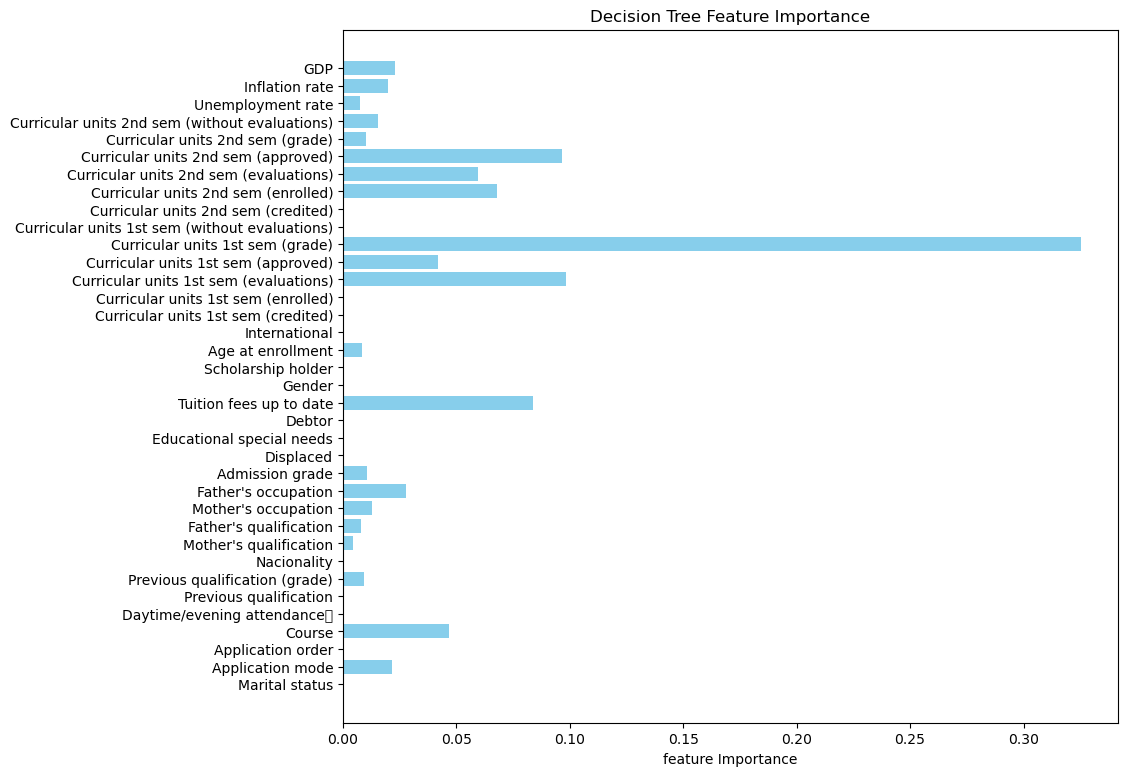

In [248]:
feature_importance(dt_model_1,'Decision Tree Feature Importance')

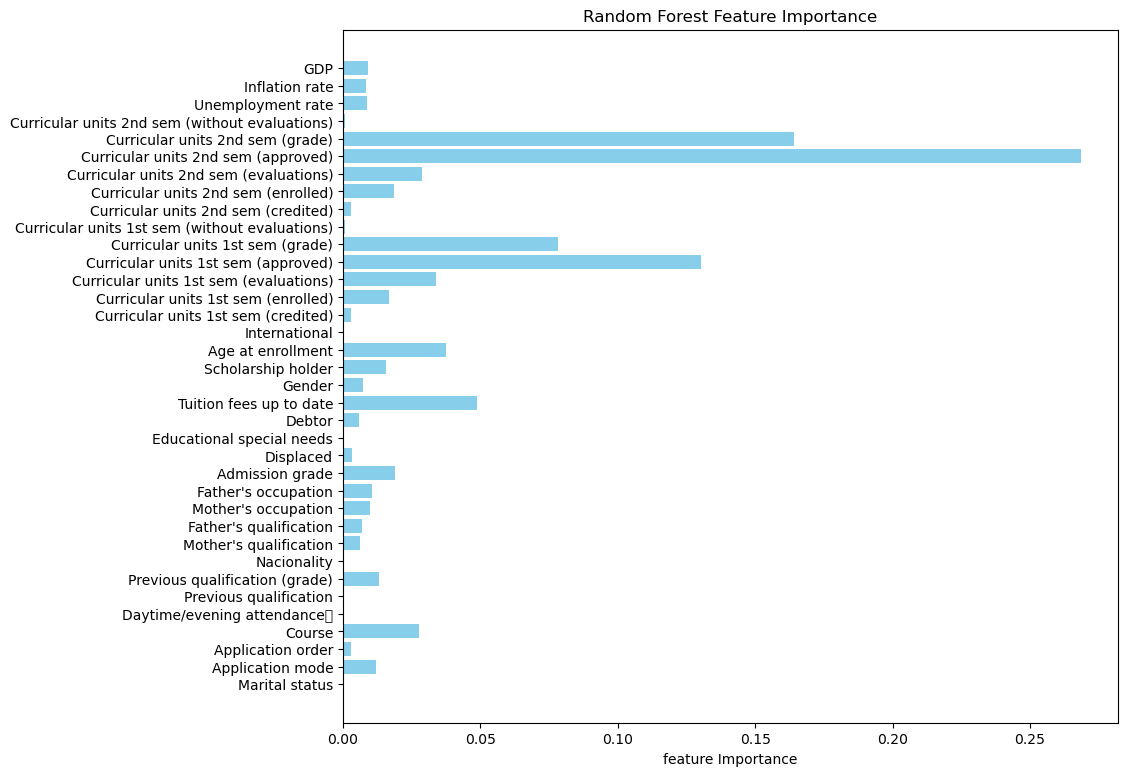

In [249]:
feature_importance(rf_model_1,'Random Forest Feature Importance')

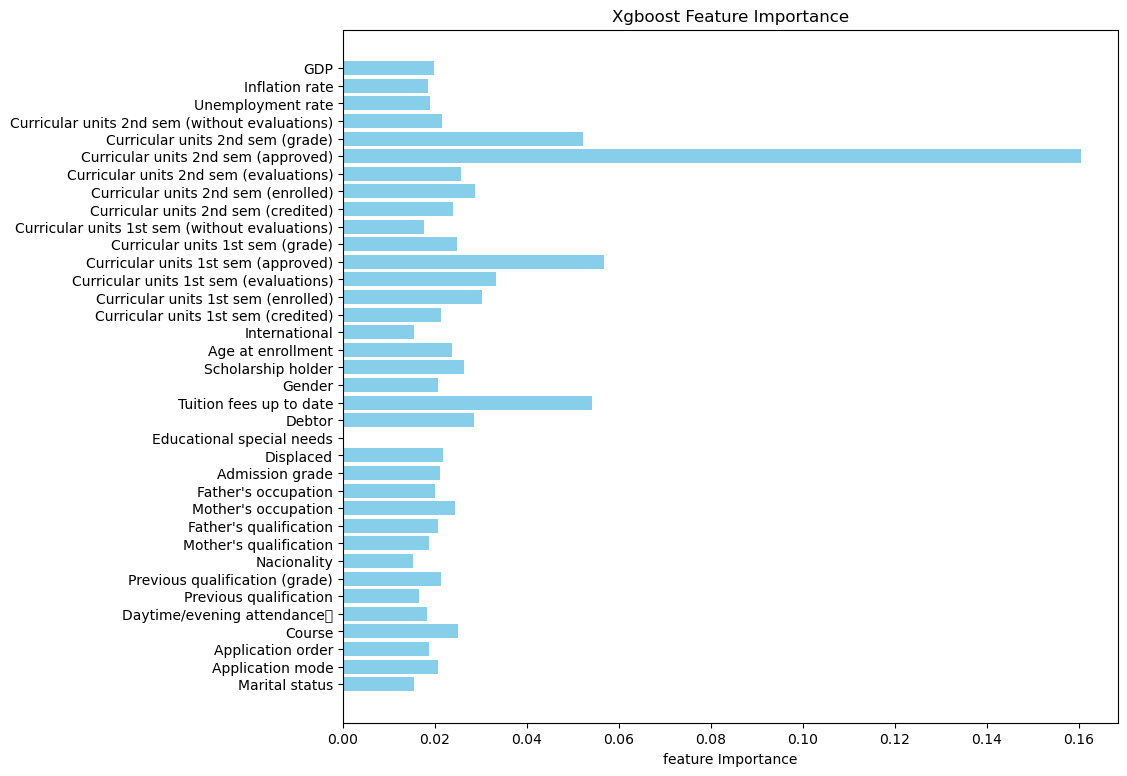

In [250]:
feature_importance(xgboost_model_6,'Xgboost Feature Importance')

In [254]:
import shap

In [287]:
def shapevalues(model,idx):
    explainer = shap.TreeExplainer(model)
    # calculate shap values for the test
    shap_values = explainer.shap_values(X_test)
    # print(len(shap_values))
    # print(shap_values.shape)
    # plot summary plot for feature importance
    shap.summary_plot(shap_values[:,:,idx],X_test,feature_names=X.columns)

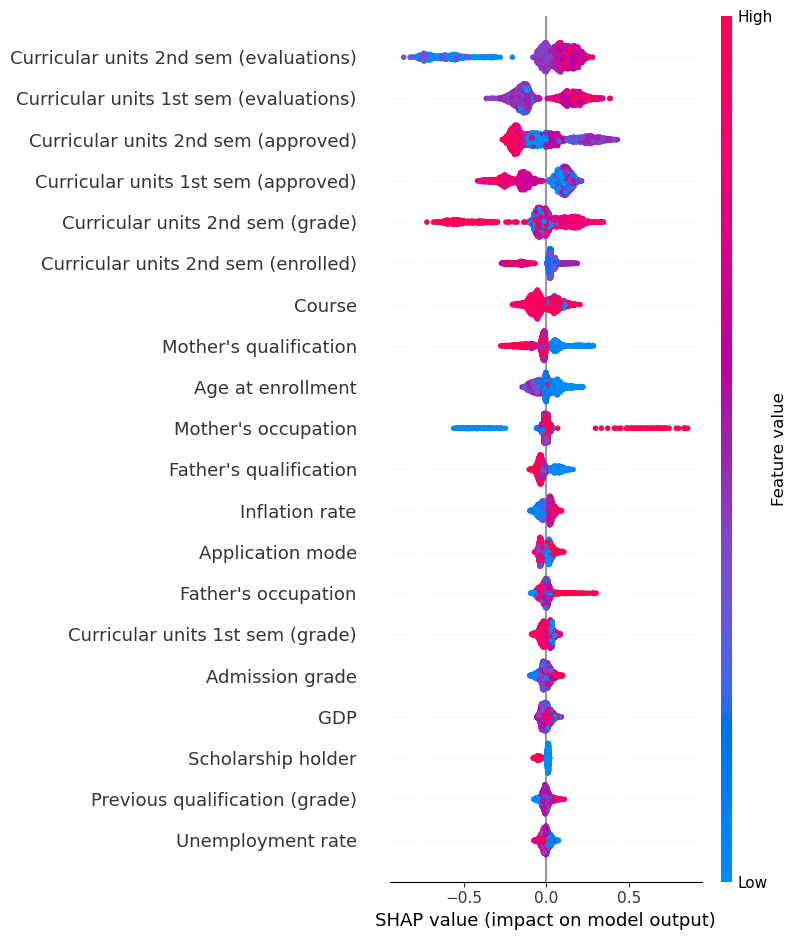

In [288]:
shapevalues(xgboost_model_6,1)

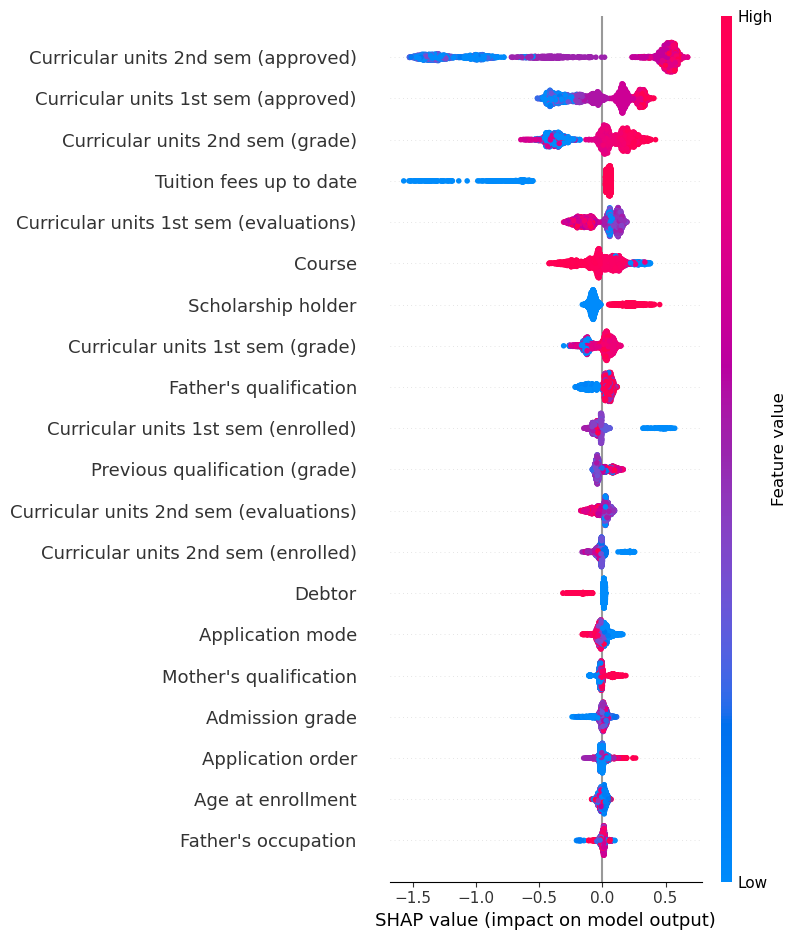

In [289]:
shapevalues(xgboost_model_6,2)

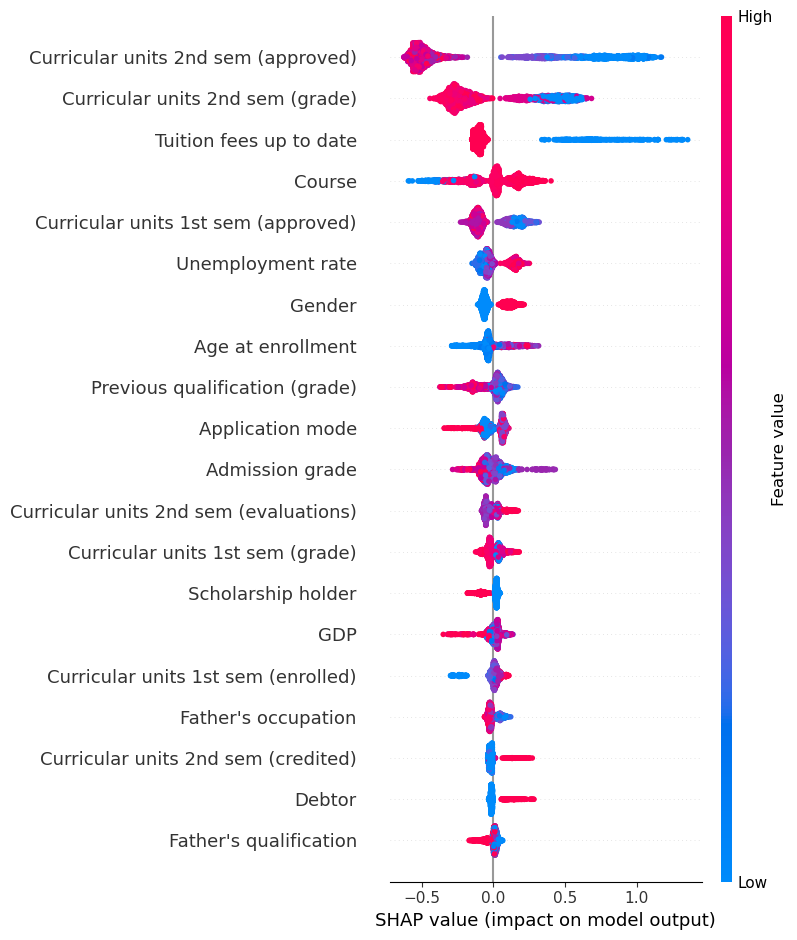

In [291]:
shapevalues(xgboost_model_6,0)

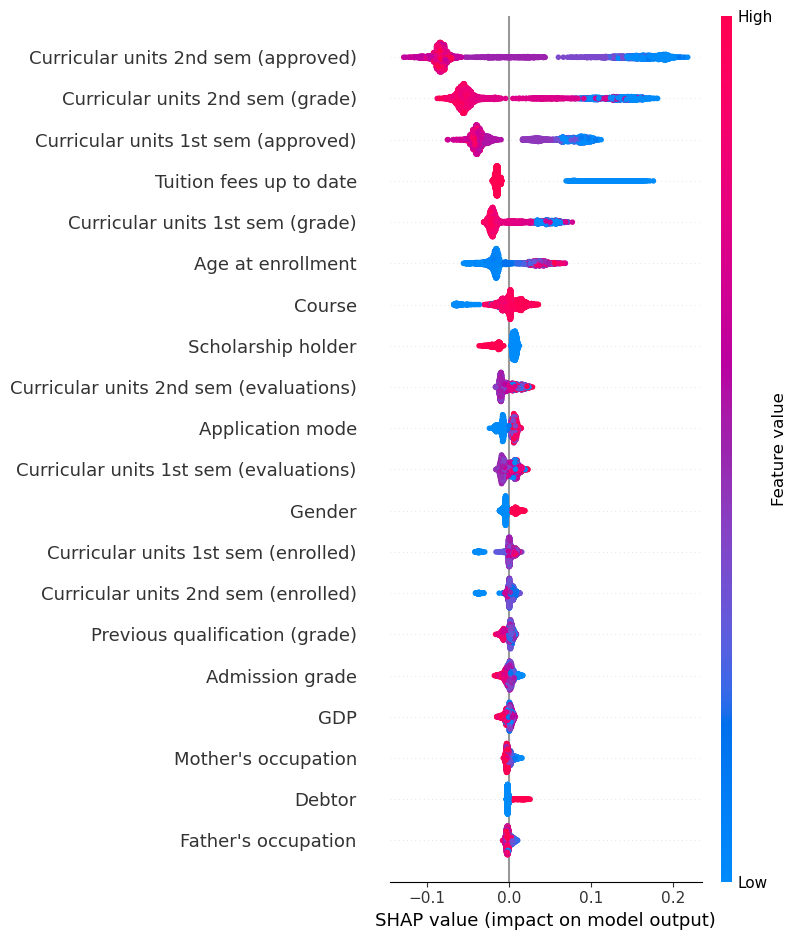

In [292]:
shapevalues(rf_model_1,0)

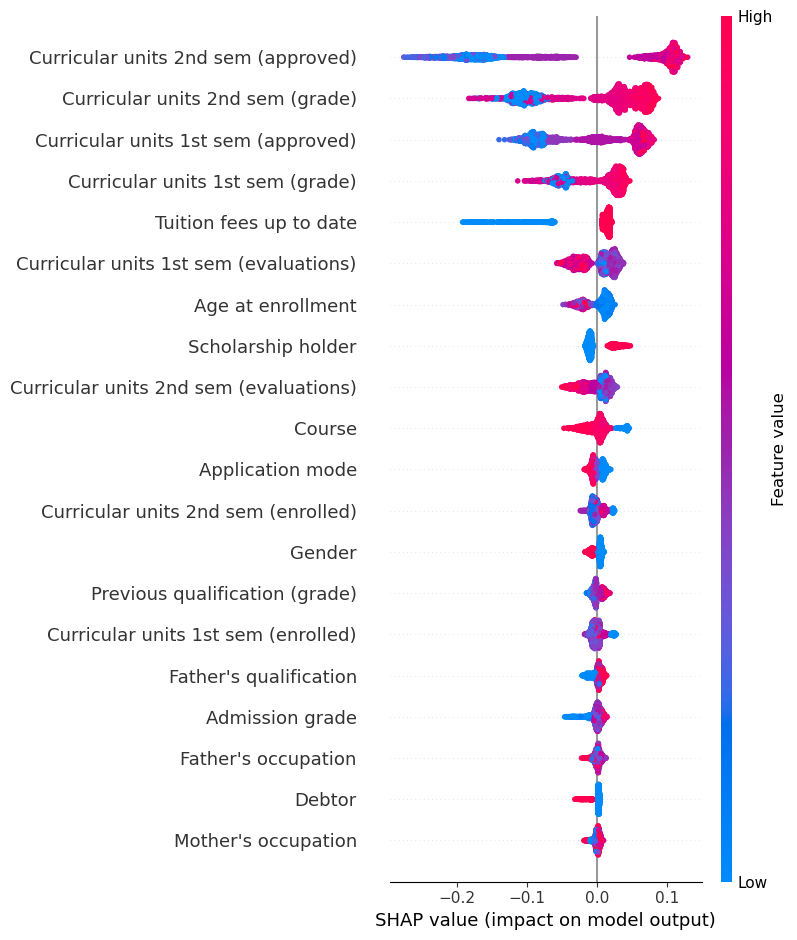

In [293]:
shapevalues(rf_model_1,2)

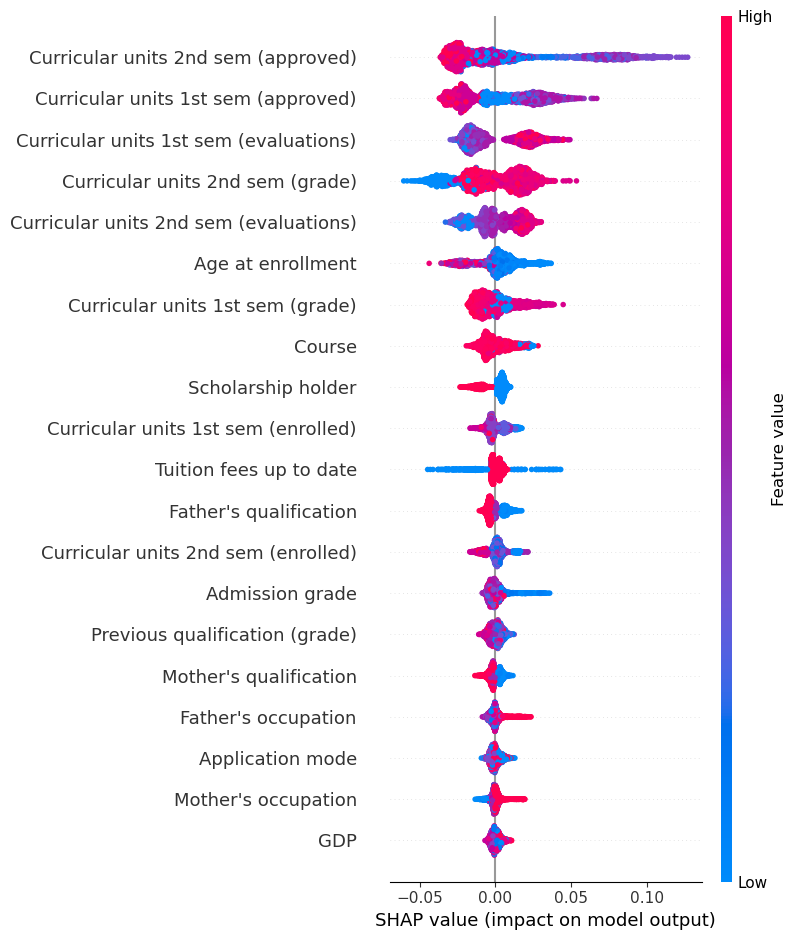

In [294]:
shapevalues(rf_model_1,1)

## Partial Dependence

In [297]:
from sklearn.inspection import PartialDependenceDisplay

In [311]:
X.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [312]:
      feature_importance=['Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
        'Tuition fees up to date']

In [332]:
def plot_partial_dependence(model,idx,title=''):
    features = feature_importance[0:]
    PartialDependenceDisplay.from_estimator(model,X_test,features,target=idx,feature_names=X.columns)
    plt.suptitle(title)
    plt.subplots_adjust(top=0.9,hspace=0.9,wspace=0.9)  # adjust title position
    plt.tight_layout()
    plt.show()

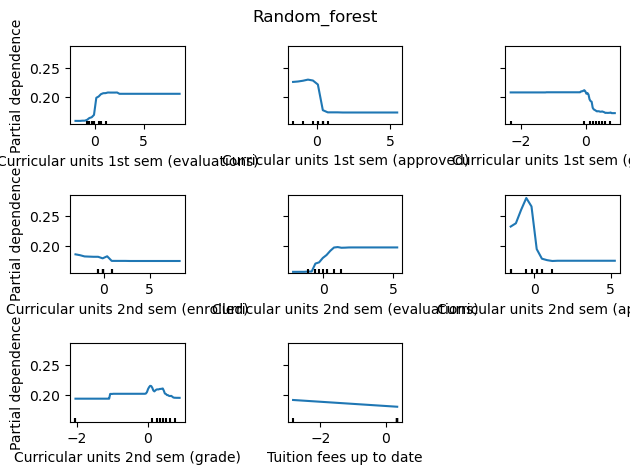

In [333]:
plot_partial_dependence(rf_model_1,1,'Random_forest')